# CLIPIT demo

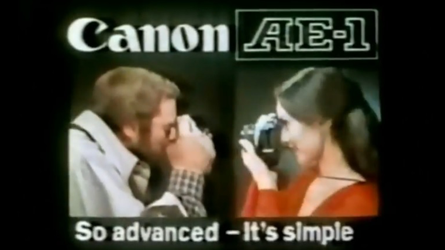

In [ ]:
#@title Setup

#@markdown Please execute this cell by pressing the _Play_ button 
#@markdown on the left. You should only need to run this part once.

#@markdown **Note**: This installs the software on the Colab 
#@markdown notebook in the cloud and not on your computer.

%%capture
!git clone https://github.com/openai/CLIP
# !pip install taming-transformers
!git clone https://github.com/CompVis/taming-transformers.git
!rm -Rf clipit
!git clone https://github.com/dribnet/clipit
!pip install ftfy regex tqdm omegaconf pytorch-lightning
!pip install kornia
!pip install imageio-ffmpeg   
!pip install einops
!pip install torch-optimizer
!pip install easydict
!pip install braceexpand
!pip install git+https://github.com/pvigier/perlin-numpy
!mkdir -p steps
!mkdir -p models

import sys
sys.path.append("clipit")

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

8.19kB [00:00, 94.3kB/s]                   


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt


100%|████████████████████████████████████████| 338M/338M [00:01<00:00, 258MiB/s]
100%|███████████████████████████████████████| 335M/335M [00:05<00:00, 62.6MiB/s]


Using device: cuda:0
Optimising using: AdamP
Using text prompts: ['sunset river snow mountain']
Using seed: 18421286589546577896


0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/kornia/utils/helpers.py:96: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  out1, out2 = torch.solve(input.to(dtype), A.to(dtype))


iter: 0, loss: 1.86897, losses: 0.941736, 0.927234


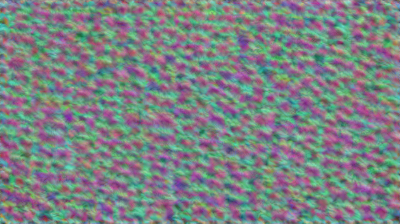

iter: 10, loss: 1.66695, losses: 0.823619, 0.843332
iter: 20, loss: 1.56153, losses: 0.76867, 0.792857


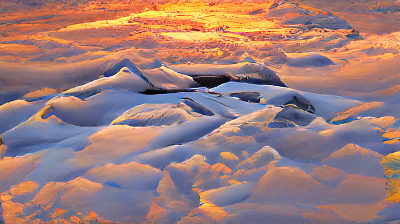

iter: 30, loss: 1.56489, losses: 0.774065, 0.790822
iter: 40, loss: 1.55191, losses: 0.768029, 0.783878


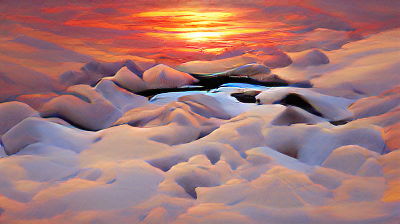

iter: 50, loss: 1.52324, losses: 0.755332, 0.767907
iter: 60, loss: 1.50628, losses: 0.749088, 0.757189


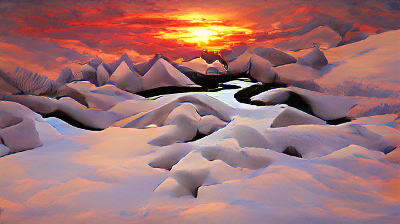

iter: 70, loss: 1.50733, losses: 0.745705, 0.761621
iter: 80, loss: 1.48007, losses: 0.734975, 0.745099


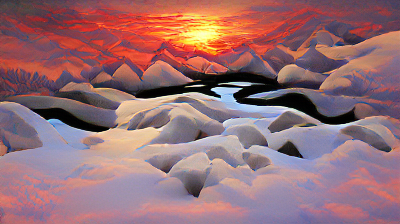

iter: 90, loss: 1.46292, losses: 0.727899, 0.735019
iter: 100, loss: 1.4973, losses: 0.743891, 0.753407


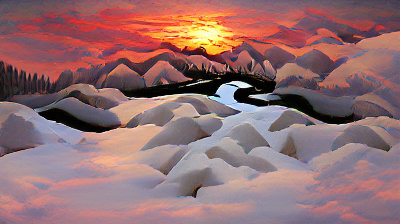

iter: 110, loss: 1.48912, losses: 0.741537, 0.74758
iter: 120, loss: 1.47733, losses: 0.736349, 0.740985


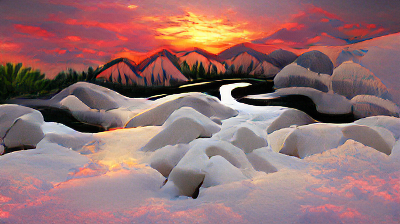

iter: 130, loss: 1.468, losses: 0.731725, 0.736274
iter: 140, loss: 1.4503, losses: 0.722833, 0.727465


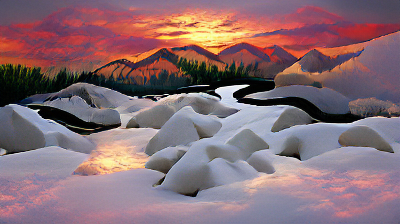

iter: 150, loss: 1.46763, losses: 0.733051, 0.734582
iter: 160, loss: 1.4555, losses: 0.72821, 0.727292


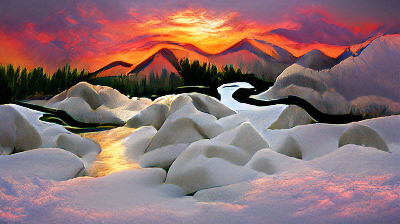

iter: 170, loss: 1.45656, losses: 0.727696, 0.728862
iter: 180, loss: 1.46843, losses: 0.732808, 0.73562


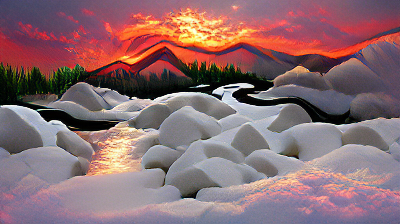

iter: 190, loss: 1.42574, losses: 0.712464, 0.713272
iter: 200, loss: 1.45427, losses: 0.726843, 0.727426


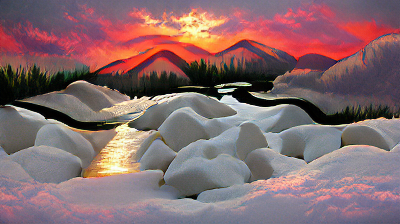

iter: 210, loss: 1.45214, losses: 0.725301, 0.72684
iter: 220, loss: 1.44033, losses: 0.721467, 0.718862


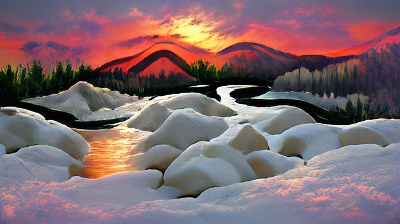

iter: 230, loss: 1.46524, losses: 0.728043, 0.737201
iter: 240, loss: 1.4645, losses: 0.730829, 0.733673


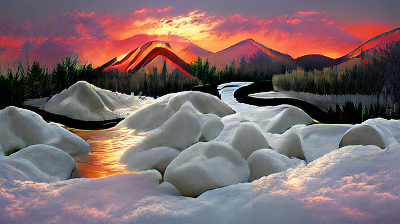

iter: 250, loss: 1.4488, losses: 0.724237, 0.72456
iter: 260, loss: 1.40366, losses: 0.702429, 0.701236


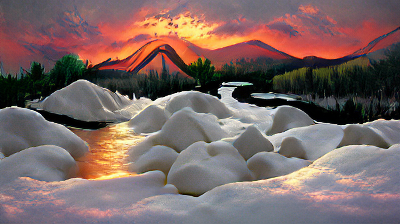

iter: 270, loss: 1.39758, losses: 0.700357, 0.697222
iter: 280, loss: 1.44231, losses: 0.722225, 0.720081


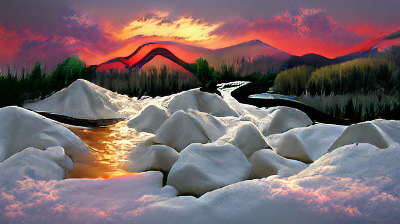

iter: 290, loss: 1.39349, losses: 0.701173, 0.692318
iter: 300, loss: 1.4438, losses: 0.722915, 0.720889


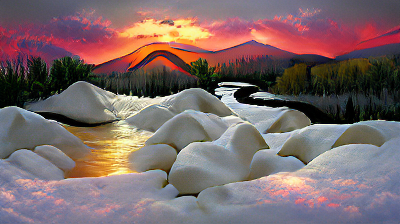

iter: 310, loss: 1.43646, losses: 0.717921, 0.718539
iter: 320, loss: 1.44002, losses: 0.719947, 0.72007


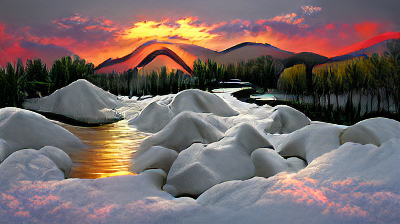

iter: 330, loss: 1.4078, losses: 0.700243, 0.707559
iter: 340, loss: 1.44323, losses: 0.721551, 0.72168


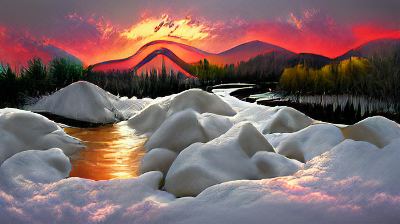

iter: 350, loss: 1.40133, losses: 0.702687, 0.698643


In [ ]:
#@title Settings for your run

#@markdown This text prompt is what the computer will try to draw.

#@title Parameters
prompts = "sunset river snow mountain" #@param {type:"string"}

#@markdown you can trade off speed for quality

quality = "normal" #@param ["draft", "normal", "better", "best"]

#@markdown some people actually like square?  ¯\\_(ツ)_/¯

aspect = "widescreen" #@param ["widescreen", "square"]

#@markdown When you have the settings you want, press the play button on the left.
#@markdown The system will start drawing and show you results as it goes along.

#@markdown _(I can get "better" running on the colabs, but not "best".
#@markdown Sometimes it is necessary to "Restart Runtime" to clear memory.)_

# Simple setup from menu choices
import clipit
clipit.reset_settings()
clipit.add_settings(prompts=prompts, aspect=aspect, quality=quality)

# Optional: you could put extra settings here...

# Apply these settings and run
settings = clipit.apply_settings()
clipit.do_init(settings)
clipit.do_run(settings)
